# Star Wars Survey - Analysis of Target Market Demographic

This document is designed to communicate the body of a data study which utilizes Python code and other related modules with team members that may not be fluent in such syntax. All code below can be executed right here in the notebook, and the resulting output will display on screen. These markdown sections will help describe what is happening in the analysis.

This study utilizes a survey (from five-thirty-eight) assessing data on fans of the Star Wars franchise. While another study will utilize this data to assess both popular and unpopular concepts and characters for marketing purposes, this study is specifically a statistical analysis of the most favorable demographic to target in Star Wars marketing campaigns. 

Note that, as I was not involved in the collection of this data and am not aware of the precise methods used, for the purposes of this mock analysis I will be making assumptions that the sample is representative of the population as a whole, and that all conditions for inference are properly met (the random condition, normal condition and indepence condition). For any hypothesis tests run, I will maintain an alpha level of 0.05.

To run this code, the following modules are used: NumPy, Pandas, Matplotlib, Scipy.stats, and finally a few stats functions that I wrote myself. Be sure to run the code line below before looking at any other cells!

In [1]:
import numpy as np
from numpy import random
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency, norm, chi2, chisquare, ttest_ind
import stat_functions as st

In [2]:
%matplotlib inline

Below is the actual csv data collected from the survey. We will here both load the csv as a dataframe object, and display some relevant information to help get us acclimated with the data.

In [3]:
df = pd.read_csv('StarWars.csv', encoding = "ISO-8859-15")
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Below are a list of all of the questions asked in the survey (some are not assigned a name value)

In [4]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

As can be seen above, each column in the survey dataframe represents relevant questions to identify potential fans and their demograpic data. However, it is clear that some cleaning is required. That said, there is enough complete data here to identify key demographic information. 

In [5]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique()

array(['Response', 'Yes', nan, 'No'], dtype=object)

The first major issue here is how this important survey question was handled. This was the second question asked in the survey. The first question was simply asking if someone had even seen a Star Wars movie. If they said no, this question was left blank. For the purposes of our market research, however, someone who has never seen the movies is not considered a fan, so instead of nan, this should be a no (someone who has never seen a movie is not a fan). Here we will include a new column, 'is_fan', which will input 'Yes' if the survey response was 'Yes', or else simply 'No'. 
This will give us a better understanding of who is a fan, and who is either disinterested or actively dislikes the Star Wars franchise.

Note: The answer 'Response' is irrelevant based on how the header in the dataframe was created. It is preserved for now to keep the data consistent.

In [6]:
df['is_fan'] = df.apply(lambda row: 'Yes' if row['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 'Yes'\
                        else ('Response' if row['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 'Response'\
                              else 'No'), axis = 1)

In [7]:
fans = df[df.is_fan == 'Yes']

In [8]:
df.groupby(['Location (Census Region)', 'is_fan']).RespondentID.count().unstack()

is_fan,No,Response,Yes
Location (Census Region),,,
East North Central,97.0,NaN,84.0
East South Central,18.0,NaN,20.0
Middle Atlantic,58.0,NaN,64.0
Mountain,30.0,NaN,49.0
New England,31.0,NaN,44.0
Pacific,89.0,NaN,86.0
Response,NaN,0.0,NaN
South Atlantic,82.0,NaN,88.0
West North Central,40.0,NaN,53.0


To apply some inference to the proportions generated in this analysis, the code below is designed to generate random samples based on the sample findings, so that simulated repetitions of the survey can be repeated multiple times (usually about 1000). This permits a simulated sample distribution of a sample proportion, from which confidence intervals can be calculated.

In [9]:
def sample(df, labels, test_label, n = 1000):
    choices = labels
    weights = (df['Proportion of Respondents'].values / 100)
    proportions = []
    
    for i in range(n):
        simulate = pd.DataFrame({'values':np.random.choice(choices, len(fans), p=weights)})
        proportions.append(simulate['values'].value_counts(normalize = True).loc[test_label])
    
    simulation = pd.DataFrame({'proportion':proportions})
    quantiles = [simulation.proportion.quantile(0.025), simulation.proportion.quantile(0.975)]
    simulation.hist(bins = 40, histtype = 'step', density = True, figsize = (7,4))
    plt.title('Sample Distribution of proportion:{}'.format(test_label))
    plt.axvline(simulation.proportion.mean(), c = 'C1', label = "Mean")
    plt.axvline(quantiles[0], c = 'C1', linestyle = ':', label = '95% of distribution')
    plt.axvline(quantiles[1], c = 'C1', linestyle = ':')
    plt.legend()
    print('Confidence interval for proportion: ({} - {})'.format(quantiles[0], quantiles[1]))

## Analysis 1: Star Wars Fans by Gender

First, we will group the number of respondents into their respective gender responses, as well as whether they are fans or not. Note that this is the total number of respondents to the survey. Included as well is a briefly calculated ratio to demonstrate the percentage of each gender that are fans.

In [10]:
gender_sw_fans = df.groupby(['is_fan','Gender']).RespondentID.count().reset_index()
gender_sw_fans_pivot = gender_sw_fans.pivot(columns= 'is_fan', index = 'Gender', values = 'RespondentID')
gender_sw_fans_pivot.drop('Response', axis = 1, inplace = True)
gender_sw_fans_pivot.drop('Response', axis = 0, inplace = True)
gender_sw_fans_pivot['Ratio of Gender that are Fans'] = gender_sw_fans_pivot.apply(lambda row:\
                                                        (row.Yes /(row.Yes + row.No))* 100, axis = 1)
gender_sw_fans_pivot

is_fan,No,Yes,Ratio of Gender that are Fans
Gender,,,
Female,311.0,238.0,43.351548
Male,194.0,303.0,60.965795


It appears cursorily that more men respond as fans than women. Let's test this mathematically using a chi-squared hypothesis test:

In [11]:
con_list = gender_sw_fans_pivot.loc[['Female', 'Male'],['Yes', 'No']].values.tolist()
print(con_list)
chi2, pval = st.chi2_homogeneity(con_list)
print(pval)

[[238.0, 311.0], [303.0, 194.0]]
1.2474230204340131e-08


As the pvalue is less that 0.05, we reject the null hypothesis and assume statistical significance. Therefore, we have evidence that the distribution of fans in Star Wars favors men more than women.

The sample seems to indicate that this difference is over 17%, which is substantial. Here we will calculate a confidence interval for the difference of proportions in these samples, to get an idea at 95% confidence of the true difference between men and women in terms of being Star Wars fans:

In [12]:
sums = [np.sum(i) for i in con_list]

ratios = gender_sw_fans_pivot['Ratio of Gender that are Fans'].values.tolist()
good_ratios = [i/100 for i in ratios]

print(st.diff_z_intv(good_ratios[1], sums[1], good_ratios[0], sums[0]))

(0.11649559670562445, 0.23578933327498777)


It appears that, from the information we have gathered, there is good evidence to assume that the difference between men and women in terms of proportion of fans in their populations is around 11.5%-23.5%.

# Breakdown of fans by Age and Gender

The code below creates a count of star wars fans as they fit within age groups. They are also separated into men and women so that we can compare these categories clearly. The ratio fan/not fan as well as the total number of yes and no responses given per age group and gender are displayed below:

In [13]:
gender_age_fan_sw = df.groupby(['is_fan','Gender', 'Age']).RespondentID.count().reset_index().sort_values\
(by = ['Gender','Age'])

gender_age_fan_sw_pivot = gender_age_fan_sw.pivot_table(columns='is_fan',\
                                                        index=['Gender', 'Age'], values = 'RespondentID')
gender_age_fan_sw_pivot.drop('Response', axis = 1, inplace = True)
gender_age_fan_sw_pivot.drop('Response', axis = 0, inplace = True)

gender_age_fan_sw_pivot['Ratio that are Fans'] = gender_age_fan_sw_pivot.apply(lambda row:\
                                                                    (row.Yes /((row.Yes + row.No))) * 100, axis = 1)
gender_age_fan_sw_pivot

is_fan          No   Yes  Ratio that are Fans
Gender Age                                   
Female 18-29  64.0  50.0            43.859649
       30-44  77.0  59.0            43.382353
       45-60  77.0  74.0            49.006623
       > 60   93.0  55.0            37.162162
Male   18-29  30.0  74.0            71.153846
       30-44  41.0  91.0            68.939394
       45-60  60.0  80.0            57.142857
       > 60   63.0  58.0            47.933884

Cursorily, we can identify the highest number and ratio of favorable response among men in the 18-29 and 30-44 year old age ranges. We will now test statistical significance of the age group differences among men in these age groups:

In [14]:
gender_age_no = gender_age_fan_sw_pivot['No'].values.tolist()
male_no = gender_age_no[4:]
female_no = gender_age_no[:4]
gender_age_yes = gender_age_fan_sw_pivot['Yes'].values.tolist()
male_yes = gender_age_yes[4:]
female_yes = gender_age_yes[:4]
contingency_male_lists = [[a,b] for a,b in zip(male_yes, male_no)]
print(contingency_male_lists)
chi2, pval, dof, expected = chi2_contingency(contingency_male_lists)
print(pval)

[[74.0, 30.0], [91.0, 41.0], [80.0, 60.0], [58.0, 63.0]]
0.0005426107198083925


The probability of the null hypothesis - that there is no significant difference in age parameters of male Star Wars fans - is about 0.05%, which is therefore rejected. We therefore find evidence for statistical significance. The ratio of fans in the 18-29 and 30-44 age groups are very close, however, and it is difficult to tell if there's any reason to assume from this data that 18-29 year olds react any more postively than 30-44 year olds. 

We will test this specific group now with a two sample z test, against a null hypothesis that the actual difference between these two proportions in the population is 0:

In [15]:
zstat, pval = st.two_samp_z_test(contingency_male_lists[0], contingency_male_lists[1])
print(pval)

0.3563396071939904


The probability of this null hypothesis is much higher, and we fail to reject. It is reasonably likely that there is no significant difference in the proportion of fans in both age groups, and that therefore the age range of 18-44 has a high proprotion of male fans.

## Graphical representation of Age and Gender breakdown 

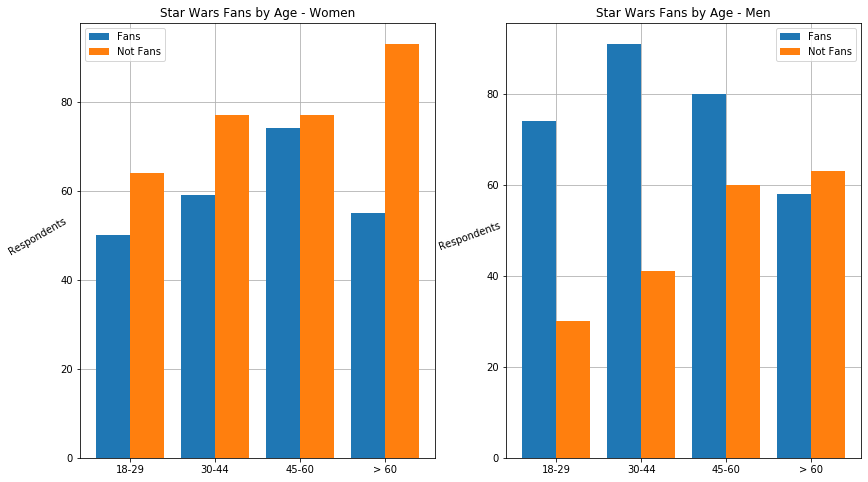

In [16]:
age_labels = ['18-29','30-44','45-60','> 60']
plt.figure(figsize = (14,8))
ax = plt.subplot(1,2,1)
ax.grid(zorder = 0)
yesx = [2 * el + (0.8 *1) for el in range(4)]
nox = [2 * el + (0.8 * 2) for el in range(4)]
middle = [(a + b)/2 for a,b in zip(yesx, nox)]
plt.bar(yesx, female_yes, zorder = 3)
plt.bar(nox, female_no, zorder =3)
ax.set_xticks(middle)
ax.set_xticklabels(age_labels)
plt.ylabel('Respondents', rotation = 30, labelpad = 20)
plt.title('Star Wars Fans by Age - Women')
plt.legend(['Fans', 'Not Fans'])
ax1 = plt.subplot(1,2,2)
ax1.grid(zorder = 0)
plt.bar(yesx, male_yes, zorder = 3)
plt.bar(nox, male_no, zorder = 3)
ax1.set_xticks(middle)
ax1.set_xticklabels(age_labels)
plt.ylabel('Respondents', rotation = 20, labelpad = 15)
plt.title('Star Wars Fans by Age - Men')
plt.legend(['Fans', 'Not Fans'])
#plt.savefig('Male_female_age_breakdown.png')
plt.show()

## Graph representation of Male Fans by Ratio

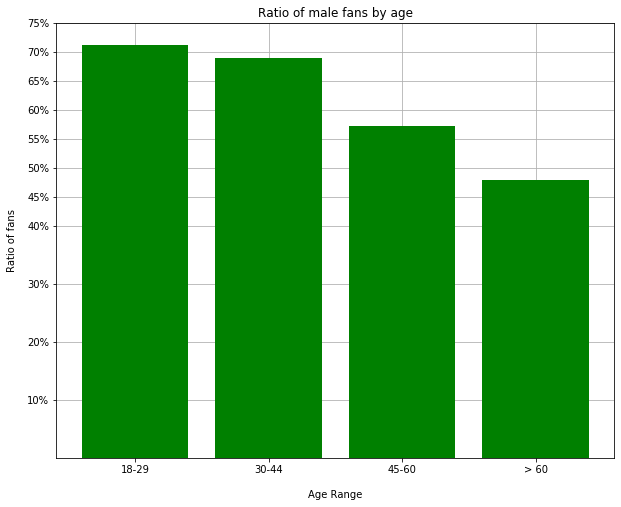

In [17]:
ratio_fans = gender_age_fan_sw_pivot['Ratio that are Fans'].values.tolist()
male_fan_ratio= ratio_fans[4:]
plt.figure(figsize = (10,8))
ax = plt.subplot()
ax.grid(zorder = 0)
plt.bar(range(len(male_fan_ratio)), male_fan_ratio, color = 'green', zorder = 3)
ax.set_yticks([10, 20, 30, 40, 45, 50, 55, 60, 65, 70, 75])
ax.set_yticklabels(['10%','20%','30%','40%','45%','50%','55%','60%','65%','70%','75%'])
plt.ylabel('Ratio of fans', labelpad = 10)
ax.set_xticks(range(len(age_labels)))
ax.set_xticklabels(age_labels)
plt.xlabel('Age Range', labelpad = 15)
plt.title('Ratio of male fans by age')
#plt.savefig('Ratio_of_male_fans.png')
plt.show()

# Breakdown of fans by Income levels 

An analysis of household income ranging from under \\$25,000 to over \\$150,000 to see if a greater quantity of fans exist in any particular income bracket.

In [18]:
income_breakdown = fans.groupby('Household Income').RespondentID.count().reset_index().sort_values(by = 'Household Income')
income_breakdown_clean = income_breakdown[income_breakdown['Household Income'] != 'Response']
new_index = ['$0 - $24,999', '$25,000 - $49,999','$50,000 - $99,999 ','$100,000 - $149,999','$150,000+']
ordered_income_breakdown = income_breakdown_clean.reindex([0, 3, 4, 1, 2]).reset_index()
income_nums = ordered_income_breakdown.RespondentID.values.tolist()
total =sum(income_nums)
ordered_income_breakdown['Proportion of Respondents'] = ordered_income_breakdown.RespondentID.apply\
(lambda x: (x / total) * 100)

ordered_income_breakdown.rename(columns = {'RespondentID':'Total_Respondents'}, inplace = True)
ordered_income_breakdown.drop('index', axis = 1)

,Household Income,Total_Respondents,Proportion of Respondents
0,"$0 - $24,999",61,14.022989
1,"$25,000 - $49,999",84,19.310345
2,"$50,000 - $99,999",156,35.862069
3,"$100,000 - $149,999",79,18.160920
4,"$150,000+",55,12.643678


In [19]:
distribution = ordered_income_breakdown.Total_Respondents.values.tolist()
chi_2, pval = chisquare(distribution)
print(pval)

1.894685914951163e-15


Confidence interval for proportion: (0.3188405797101449 - 0.39855072463768115)


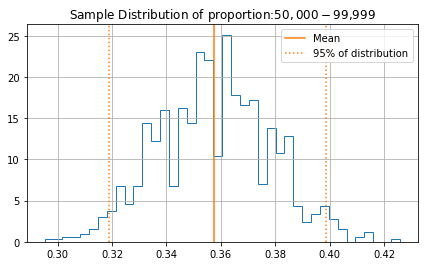

In [20]:
sample(ordered_income_breakdown,ordered_income_breakdown['Household Income'],
                                                         ordered_income_breakdown['Household Income'][2])

In [21]:
st.z_conf_intv((ordered_income_breakdown['Proportion of Respondents'][2] / 100), len(fans))

(0.31861205820341776, 0.39862932110692706)

It appears that the distribution of fans by income is not uniform, and that it follows an approximately normal distribution, with the majority of fans in the \\$50,000- \\$99,000 range. Using both a simulated sample distribution of the sample proportion and a mathematical evaluation of the sample proportion, it appears that our 95% confidence interval for this proportion lies between about 32% to 40%.

This is expected given the age range of 18-44, which also generally falls in this distribution of income as a whole.

## Graphical Representation of Income Breakdown

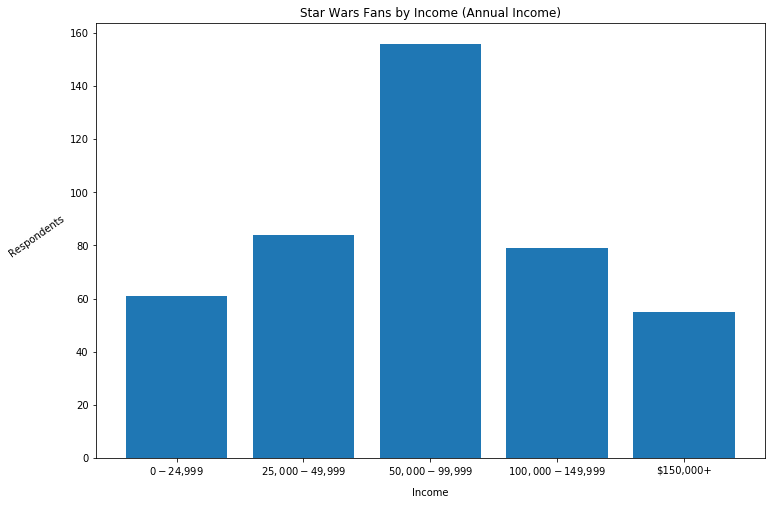

In [22]:
income_nums = ordered_income_breakdown.Total_Respondents.values.tolist()
plt.figure(figsize = (12,8))
ax = plt.subplot()
plt.bar(range(len(income_nums)), income_nums)
labels = ordered_income_breakdown['Household Income'].values.tolist()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.ylabel('Respondents', rotation = 35, labelpad = 30)
plt.xlabel('Income', labelpad = 10)
plt.title('Star Wars Fans by Income (Annual Income)')
#plt.savefig('SWfans_income.png')
plt.show()

# Breakdown of Fans by Education Level

In [23]:
education = fans.groupby('Education').RespondentID.count().reset_index()
education_clean = education[education.Education != 'Response']

education_ordered = education_clean.reindex([3, 2, 0, 1]).reset_index()

total = sum(education_ordered.RespondentID.values)
education_ordered['Proportion of Respondents'] = education_ordered.RespondentID.apply(lambda x: (x/total) * 100)
education_ordered.rename(columns = {'RespondentID':'Total_Respondents'}, inplace = True)
education_ordered.drop('index', axis = 1)

,Education,Total_Respondents,Proportion of Respondents
0,Less than high school degree,3,0.815217
1,High school degree,41,11.141304
2,Bachelor degree,172,46.739130
3,Graduate degree,152,41.304348


The above data illustrates the number of fans as they are arranged by the highest level education degree they have earned. This is relatively unsurprising, given the age and income levels of the population sample surveyed. The largest concentration of fans have earned either a Bachelor's Degree or a Graduate Degree.

The following data will illustrate how only the men in this survey are broken down by education level:

In [24]:
men_fans = fans[fans.Gender == 'Male']
education_men = men_fans.groupby('Education').RespondentID.count().reset_index()
education_men_clean = education_men[education_men.Education != 'Response']
ordered_men = education_men_clean.reindex([3, 2, 0, 1]).reset_index()
total_1 = sum(ordered_men.RespondentID.values)
ordered_men['Proportion of Respondents'] = ordered_men.RespondentID.apply(lambda x: (x/total_1) * 100)
ordered_men.rename(columns = {'RespondentID':'Total_Respondents'}, inplace = True)
ordered_men.drop('index', axis = 1)

,Education,Total_Respondents,Proportion of Respondents
0,Less than high school degree,2,0.990099
1,High school degree,30,14.851485
2,Bachelor degree,90,44.554455
3,Graduate degree,80,39.603960


Confidence interval for proportion: (0.40398550724637683 - 0.48731884057971014)


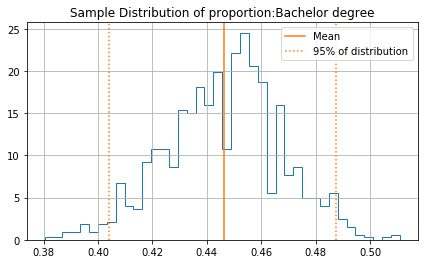

In [25]:
sample(ordered_men, ordered_men['Education'], ordered_men['Education'][2])

Confidence interval for proportion: (0.35321557971014494 - 0.4384057971014493)


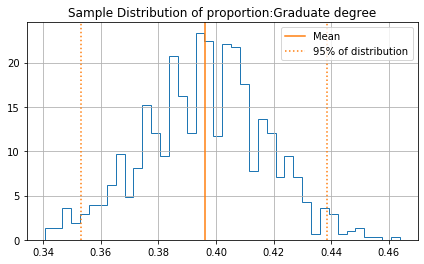

In [26]:
sample(ordered_men, ordered_men['Education'], ordered_men['Education'][3])

The proportion of fans appears to be very similar, indicating that there is no statistically different education level for men from the entire population. The total number of fans in both the whole sample and the male only education breakdown will be now compared with a chi squared homogeneity test:

In [27]:
pop_lists = [education_ordered['Total_Respondents'].values.tolist(), ordered_men['Total_Respondents'].values.tolist()]
print(pop_lists)
chi_2, pval = st.chi2_homogeneity(pop_lists)
print(pval)

[[3, 41, 172, 152], [2, 30, 90, 80]]
0.6336595585471168


Given the probability of the null hypothesis being over 5%, we fail to reject. It appears that the distribution of male fans by education level are not significanlty different from the population distribution by education level in terms of Star Wars fans.

## Graph of Education Breakdown - Whole Population and Only Male

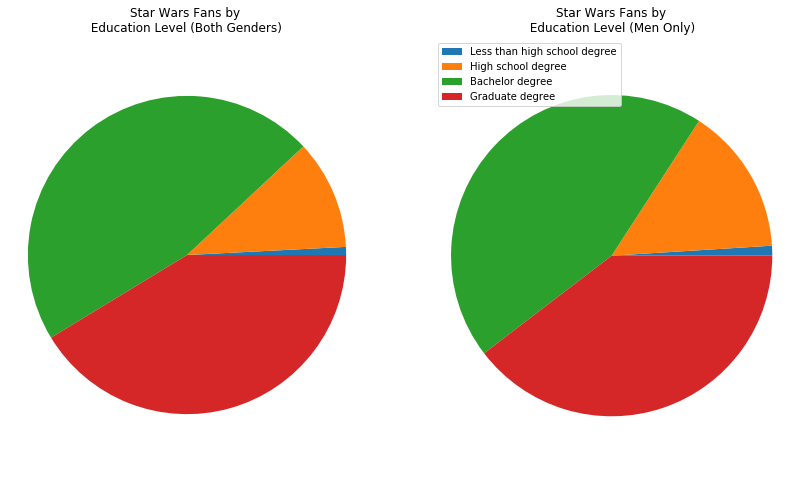

In [28]:
plt.figure(figsize = (14,8))
ax = plt.subplot(1,2,1)
plt.pie(education_ordered.Total_Respondents.values)
plt.axis('equal')
plt.title('Star Wars Fans by\n Education Level (Both Genders)')
ax_1 = plt.subplot(1,2,2)
plt.pie(ordered_men.Total_Respondents.values)
plt.axis('equal')
plt.title('Star Wars Fans by\n Education Level (Men Only)')
plt.legend(ordered_men.Education.values, loc = 2)
#plt.savefig('SWfans_education.png')
plt.show()

As can be shown, there is no significant apparent difference, and the vast majority of fans have a Bachelor's and/or Graduate Degree.

# Breakdown of Fans by Region

Can it be shown that any particular region of the US has a higher concentration of fans? Here are the results as shown in the survey:

In [29]:
region = fans.groupby('Location (Census Region)').RespondentID.count().reset_index()
region_clean = region[region['Location (Census Region)'] != 'Response']
ordered_region = region_clean#.reindex([0,1,8,9,5,2,7,3,4]).reset_index()
ordered_region.rename(columns = {'RespondentID':'Total_Respondents'}, inplace = True)
ordered_region = ordered_region[['Location (Census Region)', 'Total_Respondents']]
#ordered_region.drop(index = 3, inplace = True)
ordered_region

,Location (Census Region),Total_Respondents
0,East North Central,84
1,East South Central,20
2,Middle Atlantic,64
3,Mountain,49
4,New England,44
5,Pacific,86
6,South Atlantic,88
7,West North Central,53
8,West South Central,53


In [30]:
total = ordered_region.Total_Respondents.sum()
ordered_region['Proportion of Respondents'] = ordered_region.apply(lambda row:\
                                                            row.Total_Respondents / total * 100, axis = 1)

In [31]:
ordered_region

,Location (Census Region),Total_Respondents,Proportion of Respondents
0,East North Central,84,15.526802
1,East South Central,20,3.696858
2,Middle Atlantic,64,11.829945
3,Mountain,49,9.057301
4,New England,44,8.133087
5,Pacific,86,15.896488
6,South Atlantic,88,16.266174
7,West North Central,53,9.796673
8,West South Central,53,9.796673


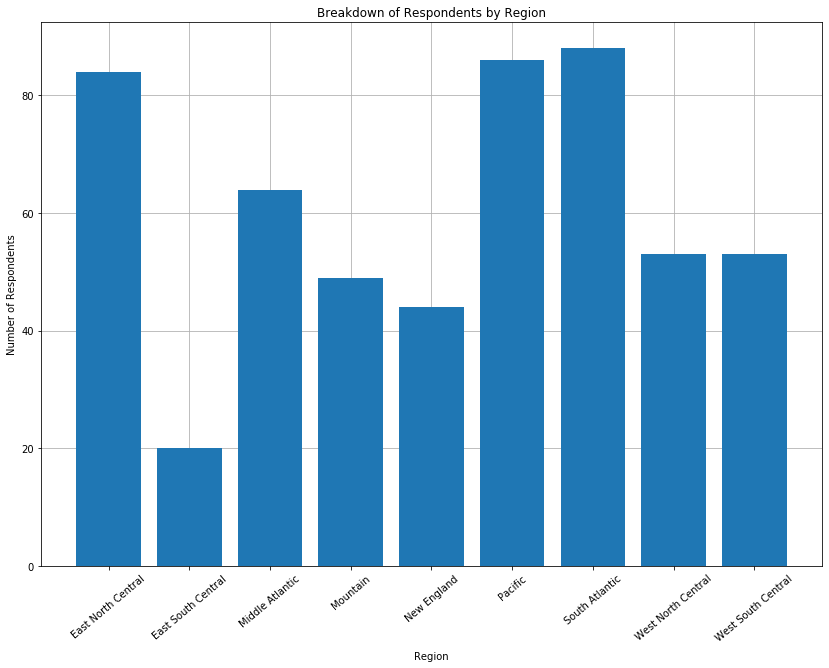

In [32]:
y = ordered_region.Total_Respondents.values.tolist()
x = range(len(y))
labels = ordered_region['Location (Census Region)'].values.tolist()
plt.figure(figsize = (14, 10))
ax = plt.subplot()
ax.grid(zorder = 0)
plt.bar(x, y, zorder = 3)
plt.xlabel('Region', labelpad = 8)
plt.ylabel('Number of Respondents')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation = 40)
plt.title('Breakdown of Respondents by Region')
#plt.savefig('Respondents_by_region.png')
plt.show()

In [33]:
regions = ordered_region['Total_Respondents'].values.tolist()
print(regions)
chi_2, pval = chisquare(regions)
print(pval)

[84, 20, 64, 49, 44, 86, 88, 53, 53]
9.101990908588069e-12


Confidence interval for proportion: (0.1322463768115942 - 0.19384057971014493)


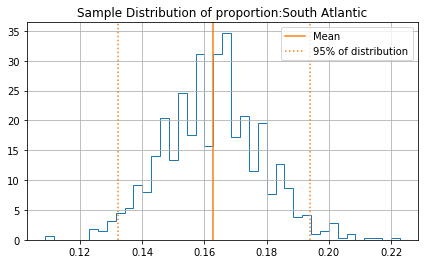

In [34]:
sample(ordered_region, ordered_region['Location (Census Region)'],ordered_region['Location (Census Region)'][6])

In [35]:
st.z_conf_intv((ordered_region['Proportion of Respondents'][6] / 100), ordered_region.Total_Respondents.sum())

(0.13156300919642058, 0.19376046584979015)

Confidence interval for proportion: (0.12681159420289856 - 0.18478260869565216)


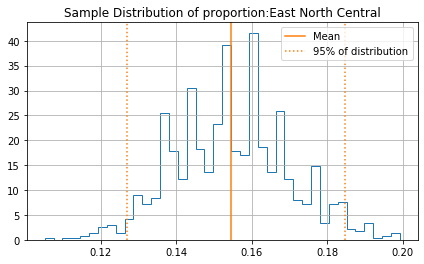

In [36]:
sample(ordered_region, ordered_region['Location (Census Region)'],ordered_region['Location (Census Region)'][0])

In [37]:
st.z_conf_intv((ordered_region['Proportion of Respondents'][0] / 100), ordered_region.Total_Respondents.sum())

(0.12475045309377247, 0.18578559126851957)

Confidence interval for proportion: (0.1286231884057971 - 0.19202898550724634)


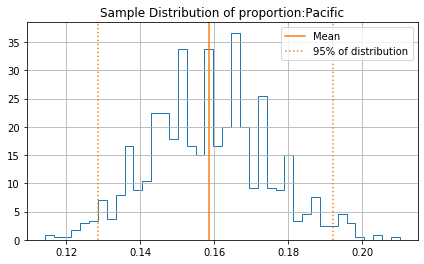

In [38]:
sample(ordered_region, ordered_region['Location (Census Region)'],ordered_region['Location (Census Region)'][5])

In [39]:
st.z_conf_intv((ordered_region['Proportion of Respondents'][5] / 100), ordered_region.Total_Respondents.sum())

(0.12815378596848598, 0.18977597373576544)

Analyzing the distribution of fans in these regions from the samples provided, there seems to be evidence that Star Wars fans are not evenly distributed throughout these regions. The sample data suggests there to be a higher concentration of fans in the East North Central, South Atlantic, and Pacific US regions, each having a confidence interval of about 13% - 19% of the proportion of fans being in these areas.

The fewest fans are the East South Central region. All other regions are much closer to evenly distributed among each other.

## Who Shot First, Han or Greedo?

A popular and ongoing debate among Star Wars fans is the simple question of "who shot first" in an infamous scene of the first movie made in the franchise. Because of the popularity of this scene among fans, it has a strong potential to be utilized for favorable response in advertisements. This is meant to help get a measure of public opinion on what the answer is (or if they are aware of it at all).

The first question to ask - is this Star Wars meme so popular that even people who aren't fans resonate with it? One way to examine this is to construct a hypothesis test with the null hypothesis that there is no difference between the most popular response and the proportion of people who do not resonate at all. If this is rejected, we can further identify if there's a clear significant difference between the responses of "Han" or "Greedo." 

I will conduct this first for the entire survey sample, then again for just fans, to analyze the reception of public opinion.

In [40]:
shot_first = df['Which character shot first?'].value_counts().reset_index()

In [41]:
total = shot_first['Which character shot first?'].sum()
shot_first['Proportion of Respondents'] = shot_first.apply(lambda row: row['Which character shot first?'] / total*100,\
                                                          axis = 1)
shot_first = shot_first[shot_first['index'] != 'Response']
shot_first

,index,Which character shot first?,Proportion of Respondents
0,Han,325,39.203860
1,I don't understand this question,306,36.911942
2,Greedo,197,23.763571


In [42]:
st.diff_z_intv(shot_first['Proportion of Respondents'][1] / 100, total,\
               shot_first['Proportion of Respondents'][0] / 100, total)

(-0.06964750319847457, 0.023809143729234483)

This function returns the confidence interval at 95% confidence of the difference between two proportions. In this case, we are looking at the difference between the proportion of respondents who are not aware of the meaning of this meme question and the proportion who hold the most popular response - that Han Solo shot first. Note that the interval captures 0, meaning that there is a greater than 5% p-value that the null hypothesis is true. Therefore I fail to reject the null hypothesis that there is no difference between the most popular survey response (that Han shot first) and a complete lack of resonance with the meme at all (I don't understand the question).

Now, let's repeat this analyis viewing only current fans of the Star Wars franchise.

In [43]:
shot_first_fans = fans['Which character shot first?'].value_counts().reset_index()

In [44]:
total = shot_first_fans['Which character shot first?'].sum()
shot_first_fans['Proportion of Respondents'] = shot_first_fans.apply(lambda row: row['Which character shot first?']\
                                                                     / total*100, axis = 1)
shot_first_fans

,index,Which character shot first?,Proportion of Respondents
0,Han,268,49.174312
1,Greedo,151,27.706422
2,I don't understand this question,126,23.119266


In [45]:
#Test between most popular response and lack of resonance with question:
st.diff_z_intv(shot_first_fans['Proportion of Respondents'][0] / 100, total,\
               shot_first_fans['Proportion of Respondents'][2] / 100, total)

(0.20564614256490177, 0.3154547748662909)

There is here a very clear interval that does not capture zero, so at a 5% alpha I reject the null hypothesis. This implies evidence that the alternative hypothesis is true - among fans, there is a significant resonance with this meme question in the Star Wars universe. Now it remains to see what we can infer about the actual proportion of responses in the population:

Confidence interval for proportion: (0.447463768115942 - 0.5344202898550725)


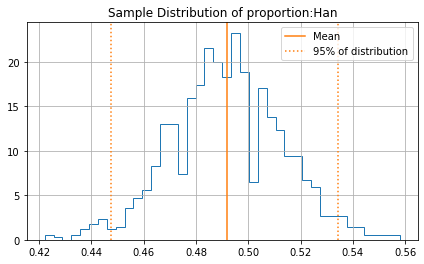

In [46]:
sample(shot_first_fans, shot_first_fans['index'].values,shot_first_fans['index'].values[0])

Confidence interval for proportion: (0.2391304347826087 - 0.31521739130434784)


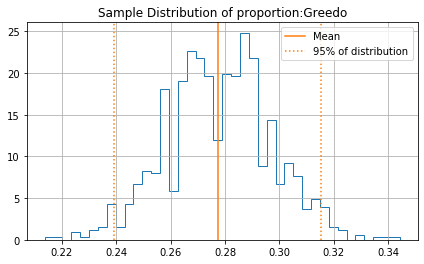

In [47]:
sample(shot_first_fans, shot_first_fans['index'].values,shot_first_fans['index'].values[1])

In [48]:
#Test between two responses:
st.diff_z_intv(shot_first_fans['Proportion of Respondents'][0] / 100, total,\
               shot_first_fans['Proportion of Respondents'][1] / 100, total)

(0.15834526611117603, 0.2710125320539616)

Text(0.5, 1.0, 'Fans answer: Who shot first?')

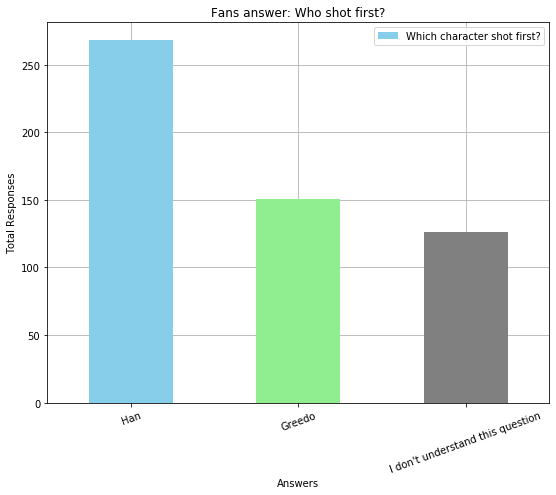

In [49]:
shot_first_fans.plot.bar('index', 'Which character shot first?',\
                         color = ['skyblue', 'lightgreen', 'grey'], zorder = 3,figsize = (9,7))
plt.xticks(rotation = 20)
plt.grid(True, zorder = 0)
plt.ylabel('Total Responses')
plt.xlabel('Answers')
plt.title("Fans answer: Who shot first?")
#plt.savefig('who_shot_first.png')

The result of the above information is that most fans believe that Han short first (likely between 45% - 53% of the population of fans), which is significantly more than the proportion of fans that beieve Greedo shot first (it is likely that between 17% - 26% more fans believe that Han shot first than that Greedo shot first). 

Therefore, it appears that, among fans, there is a strong and clear majority opinion on this meme, and that advertisements focused on current fans may prove effective if utilizing it in a strategy. However, advertisements focused on people who are not fans - perhaps with interest in bringing them into the Star Wars franchise - will not likely be as effective if utilizing this meme as a part of its marketing strategy, as it appears to be largely unknown among the general population when not considering only current fans.

# Conclusion

Based off of the study conducted, the following demographic types are the most likely to positively respond to future marketing campaigns centered on the Star Wars franchise:

* Gender - Male
* Age range - 18-44
* Income level - \\$50,000 - \\$99,000
* Education Level - Bachelor's Degree and higher
* Ideal Marketing Regions - East North Central, South Atlantic, Pacific
* Least Ideal Marketing Region - East South Central
* Han definitely shot first (but only fans resonate with this)

We can state with confidence, based on this study, that utilizing marketing strategies known to be effective with these demographic types, focused on the regions listed, are likely to be effective.

# Recommendations following this survey study
This survey has suggested many potential demographics that will be more highly receptive to Star Wars marketing campaigns. However, as this is a preliminary observation, it would be most appropriate to formally test this data with an A/B test, comparing marketing strategies targeting these demographics with previous ad campaign strategies. A separate consultation would be helpful, to get information on recommending an appropriate sample size for each group. For example, if a marketing campaign has been shown to have 30% success, and there is interest in seeing no less an increase than to 35% success (about a 17% lift), we can expect results with 95% confidence with 840 samples per variation.